
Fitur Bag-of-Words:
['aktingnya' 'alur' 'bagus' 'biasa' 'cerita' 'ceritanya' 'dan' 'dengan'
 'direkomendasikan' 'film' 'gambar' 'hebat' 'ini' 'lambat' 'luar'
 'membosankan' 'menarik' 'menyentuh' 'menyukai' 'menyukainya'
 'pengambilan' 'saja' 'sangat' 'saya' 'suka' 'terlalu' 'tetapi' 'tidak'
 'yang']

Fitur TF-IDF:
['aktingnya' 'alur' 'bagus' 'biasa' 'cerita' 'ceritanya' 'dan' 'dengan'
 'direkomendasikan' 'film' 'gambar' 'hebat' 'ini' 'lambat' 'luar'
 'membosankan' 'menarik' 'menyentuh' 'menyukai' 'menyukainya'
 'pengambilan' 'saja' 'sangat' 'saya' 'suka' 'terlalu' 'tetapi' 'tidak'
 'yang']

Hasil Naive Bayes dengan Bag-of-Words:
Akurasi: 0.3333333333333333
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.33      1.00      0.50         1

    accuracy                           0.33         3
   macro avg       0.17      0.50      0.25         3
weighted avg       0.11      0.33      0.17         3


Hasil 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

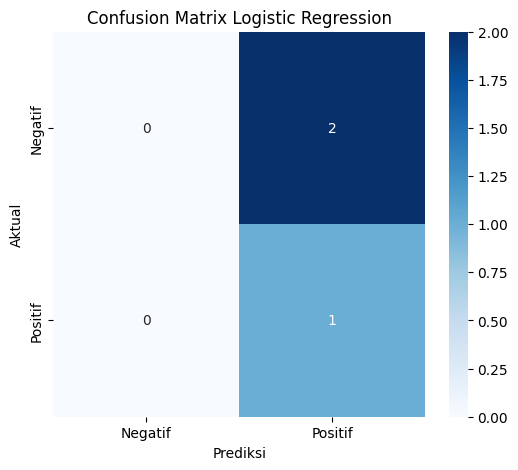


Kesimpulan:
1. Bag-of-Words adalah representasi teks sederhana berdasarkan frekuensi kata tanpa mempertimbangkan konteks.
2. TF-IDF memberikan bobot lebih tinggi pada kata-kata unik, membantu menangkap relevansi kata dalam dokumen.
3. Multinomial Naive Bayes adalah model cepat dan efektif untuk data berbasis teks seperti Bag-of-Words.
4. Logistic Regression dengan TF-IDF dapat memberikan akurasi yang lebih tinggi karena bobot kata lebih informatif.


In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Persiapan Data
# Contoh dataset sederhana untuk analisis sentimen
reviews = [
    "Film ini sangat bagus, saya menyukainya",
    "Cerita yang membosankan dan akting yang buruk",
    "Pengambilan gambar dan alur cerita sangat menarik",
    "Film yang luar biasa, sangat direkomendasikan",
    "Saya tidak suka film ini, terlalu lambat dan membosankan",
    "Luar biasa! Film ini adalah mahakarya",
    "Biasa saja, tidak terlalu menarik",
    "Saya menyukai aktingnya tetapi alur ceritanya tidak bagus",
    "Sangat buruk, tidak akan menonton lagi",
    "Film yang hebat dengan cerita yang sangat menyentuh"
]
labels = [1, 0, 1, 1, 0, 1, 0, 0, 0, 1]  # 1: Positif, 0: Negatif

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(reviews, labels, test_size=0.3, random_state=42)

# Penjelasan:
# Dataset terdiri dari ulasan film dengan label sentimen (1 untuk positif, 0 untuk negatif).
# Data dibagi menjadi data latih (70%) dan data uji (30%).

# 2. Representasi Data dengan Bag-of-Words
vectorizer = CountVectorizer()
X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.transform(X_test)

print("\nFitur Bag-of-Words:")
print(vectorizer.get_feature_names_out())

# Penjelasan:
# CountVectorizer mengubah teks menjadi representasi numerik berdasarkan frekuensi kata.

# 3. Representasi Data dengan TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

print("\nFitur TF-IDF:")
print(tfidf_vectorizer.get_feature_names_out())

# Penjelasan:
# TfidfVectorizer memberikan bobot lebih tinggi pada kata yang sering muncul dalam satu dokumen tetapi jarang muncul di dokumen lain.

# 4. Model Naive Bayes dengan Bag-of-Words
nb_model = MultinomialNB()
nb_model.fit(X_train_bow, y_train)
nb_predictions = nb_model.predict(X_test_bow)

print("\nHasil Naive Bayes dengan Bag-of-Words:")
print("Akurasi:", accuracy_score(y_test, nb_predictions))
print(classification_report(y_test, nb_predictions))

# 5. Model Logistic Regression dengan TF-IDF
lr_model = LogisticRegression(max_iter=500)
lr_model.fit(X_train_tfidf, y_train)
lr_predictions = lr_model.predict(X_test_tfidf)

print("\nHasil Logistic Regression dengan TF-IDF:")
print("Akurasi:", accuracy_score(y_test, lr_predictions))
print(classification_report(y_test, lr_predictions))

# 6. Visualisasi Confusion Matrix
cm = confusion_matrix(y_test, lr_predictions)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negatif', 'Positif'], yticklabels=['Negatif', 'Positif'])
plt.title("Confusion Matrix Logistic Regression")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.show()

# Kesimpulan
print("\nKesimpulan:")
print("1. Bag-of-Words adalah representasi teks sederhana berdasarkan frekuensi kata tanpa mempertimbangkan konteks.")
print("2. TF-IDF memberikan bobot lebih tinggi pada kata-kata unik, membantu menangkap relevansi kata dalam dokumen.")
print("3. Multinomial Naive Bayes adalah model cepat dan efektif untuk data berbasis teks seperti Bag-of-Words.")
print("4. Logistic Regression dengan TF-IDF dapat memberikan akurasi yang lebih tinggi karena bobot kata lebih informatif.")
